In [4]:
import tensorflow as tf
from numpy import argmax
from keras.optimizers import Adam
from keras.models import load_model, Sequential
from keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
np.set_printoptions(precision=3, suppress=True)

In [5]:
features = ['body-style', 'wheel-base', 'engine-size', 'horsepower', 'peak-rpm', 'highway-mpg', 'price' ]
dependent_value = ['make']

In [6]:
dataset = pd.read_csv('sample_data/Automobile_price_data_Raw_set.csv')

dataset = dataset[features+dependent_value]
dataset = dataset.dropna()

In [7]:
len(dataset['make'].unique())

21

In [8]:
X = dataset[features]
Y = dataset[dependent_value]
X

,body-style,wheel-base,engine-size,horsepower,peak-rpm,highway-mpg,price
0,convertible,88.6,130,111.0,5000.0,27,13495.0
1,convertible,88.6,130,111.0,5000.0,27,16500.0
2,hatchback,94.5,152,154.0,5000.0,26,16500.0
3,sedan,99.8,109,102.0,5500.0,30,13950.0
4,sedan,99.4,136,115.0,5500.0,22,17450.0
...,...,...,...,...,...,...,...
200,sedan,109.1,141,114.0,5400.0,28,16845.0
201,sedan,109.1,141,160.0,5300.0,25,19045.0
202,sedan,109.1,173,134.0,5500.0,23,21485.0
203,sedan,109.1,145,106.0,4800.0,27,22470.0


In [9]:
enc = LabelEncoder()
X['body-style'] = enc.fit_transform(X['body-style'])
Y['make'] = enc.fit_transform(Y['make'])

<ipython-input-9-45df72650078>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['body-style'] = enc.fit_transform(X['body-style'])
<ipython-input-9-45df72650078>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['make'] = enc.fit_transform(Y['make'])


In [10]:
num_classes = len(Y['make'].unique())
learning_rate = 0.001
epochs = 500
validation_split = 0.2
batch_size = 32

In [11]:
body_style = {
    'convertible': 0, 
    'hardtop': 1, 
    'hatchback': 2, 
    'sedan': 3, 
    'wagon': 4
}

makes = ['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo']

di_make = {i: make for i, make in enumerate(makes)}

In [12]:
def multi_layer(norm, neurons, hidden_layers, learning_rate, dropout=.5):
    model = Sequential()
    model.add(norm)

    for i in range(hidden_layers):
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(dropout))

    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [14]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Error [make]')
    plt.legend()
    plt.grid(True)
    plt.show()

In [15]:
x_normalizer = tf.keras.layers.Normalization(axis=-1)
x_normalizer.adapt(np.array(X))

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1410)

In [17]:
# model = build_and_compile_model(x_normalizer, learning_rate)

epochs=100, neurons=32, hidden_layers=2, learning_rate=0.01, dropout=0.2
2/2 [==============================] - 0s 9ms/step - loss: 3.4814 - accuracy: 0.6923
evaluation [3.4813733100891113, 0.692307710647583]


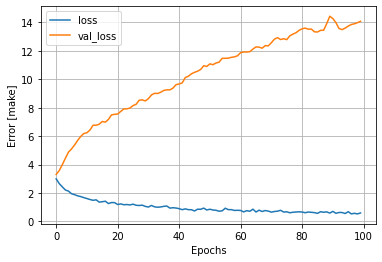

epochs=100, neurons=32, hidden_layers=2, learning_rate=0.01, dropout=0.4
2/2 [==============================] - 0s 6ms/step - loss: 3.5066 - accuracy: 0.6667
evaluation [3.506561279296875, 0.6666666865348816]


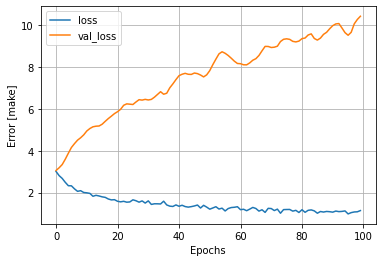

epochs=100, neurons=32, hidden_layers=2, learning_rate=0.007, dropout=0.2
2/2 [==============================] - 0s 6ms/step - loss: 3.9145 - accuracy: 0.6923
evaluation [3.9145283699035645, 0.692307710647583]


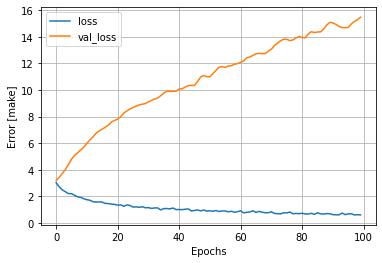

epochs=100, neurons=32, hidden_layers=2, learning_rate=0.007, dropout=0.4
2/2 [==============================] - 0s 6ms/step - loss: 3.4371 - accuracy: 0.5897
evaluation [3.4370715618133545, 0.5897436141967773]


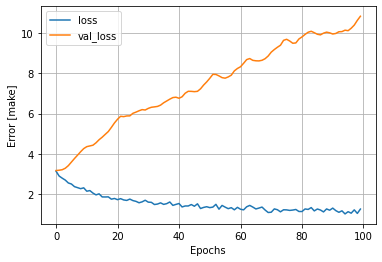

epochs=100, neurons=32, hidden_layers=4, learning_rate=0.01, dropout=0.2
2/2 [==============================] - 0s 8ms/step - loss: 3.5791 - accuracy: 0.6923
evaluation [3.5790631771087646, 0.692307710647583]


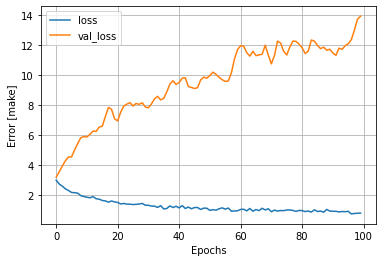

epochs=100, neurons=32, hidden_layers=4, learning_rate=0.01, dropout=0.4
2/2 [==============================] - 0s 6ms/step - loss: 3.4805 - accuracy: 0.4103
evaluation [3.4805073738098145, 0.41025641560554504]


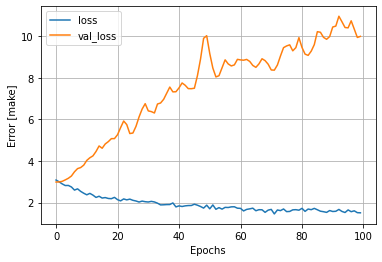

epochs=100, neurons=32, hidden_layers=4, learning_rate=0.007, dropout=0.2
2/2 [==============================] - 0s 8ms/step - loss: 3.6616 - accuracy: 0.6154
evaluation [3.661632537841797, 0.6153846383094788]


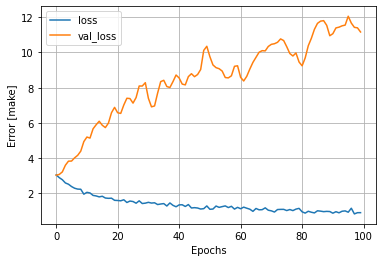

epochs=100, neurons=32, hidden_layers=4, learning_rate=0.007, dropout=0.4
2/2 [==============================] - 0s 8ms/step - loss: 3.6567 - accuracy: 0.4615
evaluation [3.6567468643188477, 0.4615384638309479]


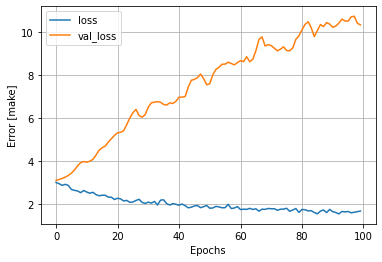

epochs=100, neurons=128, hidden_layers=2, learning_rate=0.01, dropout=0.2
2/2 [==============================] - 0s 7ms/step - loss: 4.6350 - accuracy: 0.6667
evaluation [4.6349897384643555, 0.6666666865348816]


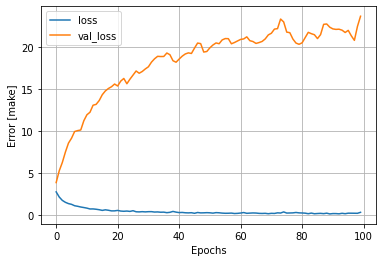

epochs=100, neurons=128, hidden_layers=2, learning_rate=0.01, dropout=0.4
2/2 [==============================] - 0s 8ms/step - loss: 3.7862 - accuracy: 0.7179
evaluation [3.786195755004883, 0.7179487347602844]


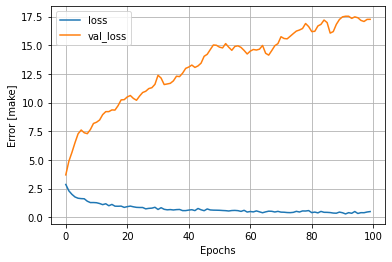

epochs=100, neurons=128, hidden_layers=2, learning_rate=0.007, dropout=0.2
2/2 [==============================] - 0s 7ms/step - loss: 3.9820 - accuracy: 0.6923
evaluation [3.9819750785827637, 0.692307710647583]


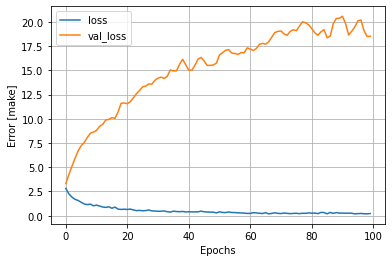

epochs=100, neurons=128, hidden_layers=2, learning_rate=0.007, dropout=0.4
2/2 [==============================] - 0s 7ms/step - loss: 4.2419 - accuracy: 0.6923
evaluation [4.241875648498535, 0.692307710647583]


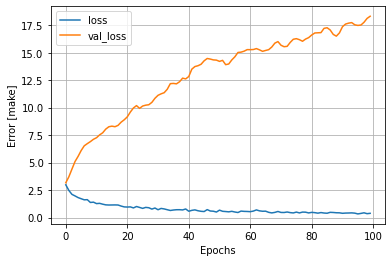

epochs=100, neurons=128, hidden_layers=4, learning_rate=0.01, dropout=0.2
2/2 [==============================] - 0s 8ms/step - loss: 4.2041 - accuracy: 0.6410
evaluation [4.204059600830078, 0.6410256624221802]


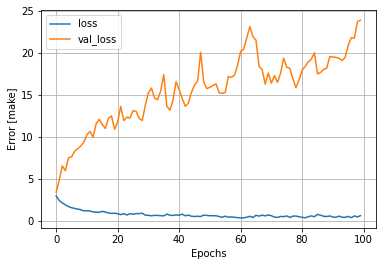

epochs=100, neurons=128, hidden_layers=4, learning_rate=0.01, dropout=0.4
2/2 [==============================] - 0s 8ms/step - loss: 3.4144 - accuracy: 0.6410
evaluation [3.4143834114074707, 0.6410256624221802]


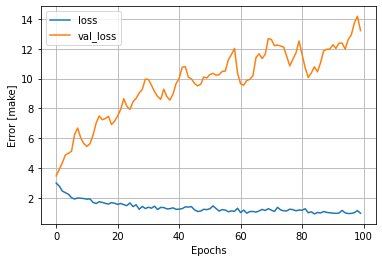

epochs=100, neurons=128, hidden_layers=4, learning_rate=0.007, dropout=0.2
2/2 [==============================] - 0s 11ms/step - loss: 3.9167 - accuracy: 0.6923
evaluation [3.9167137145996094, 0.692307710647583]


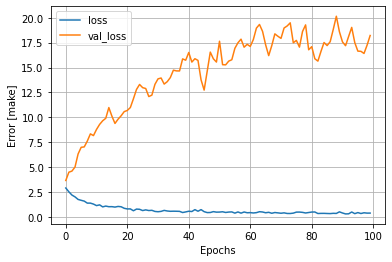

epochs=100, neurons=128, hidden_layers=4, learning_rate=0.007, dropout=0.4
2/2 [==============================] - 0s 8ms/step - loss: 2.6674 - accuracy: 0.6923
evaluation [2.667433977127075, 0.692307710647583]


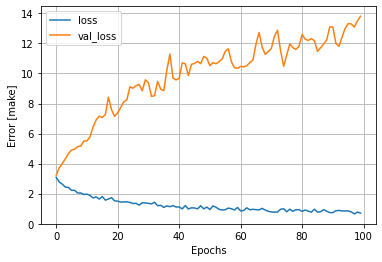

epochs=600, neurons=32, hidden_layers=2, learning_rate=0.01, dropout=0.2
2/2 [==============================] - 0s 10ms/step - loss: 4.9033 - accuracy: 0.7436
evaluation [4.903292179107666, 0.7435897588729858]


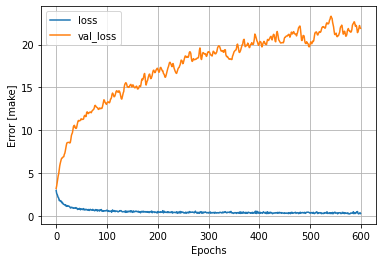

epochs=600, neurons=32, hidden_layers=2, learning_rate=0.01, dropout=0.4
2/2 [==============================] - 0s 9ms/step - loss: 5.8267 - accuracy: 0.7436
evaluation [5.826687812805176, 0.7435897588729858]


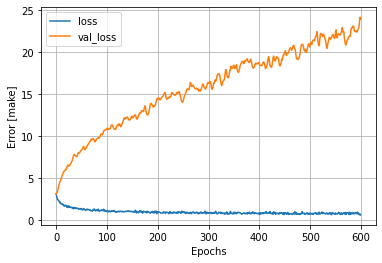

epochs=600, neurons=32, hidden_layers=2, learning_rate=0.007, dropout=0.2
2/2 [==============================] - 0s 9ms/step - loss: 5.1657 - accuracy: 0.7179
evaluation [5.16571569442749, 0.7179487347602844]


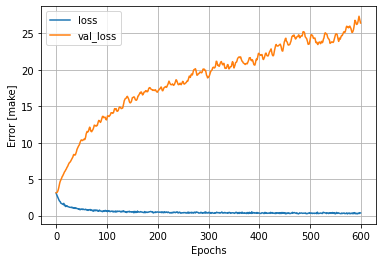

epochs=600, neurons=32, hidden_layers=2, learning_rate=0.007, dropout=0.4
2/2 [==============================] - 0s 4ms/step - loss: 4.6581 - accuracy: 0.6923
evaluation [4.658121585845947, 0.692307710647583]


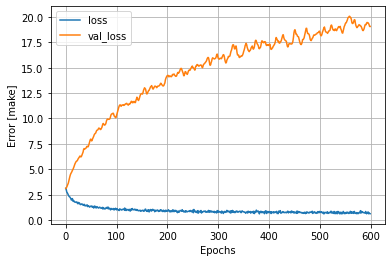

epochs=600, neurons=32, hidden_layers=4, learning_rate=0.01, dropout=0.2
2/2 [==============================] - 0s 8ms/step - loss: 3.7417 - accuracy: 0.7179
evaluation [3.7416768074035645, 0.7179487347602844]


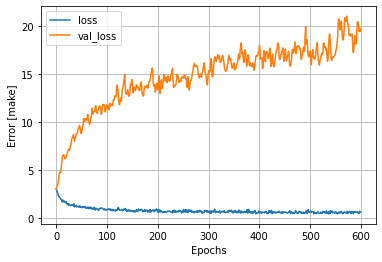

epochs=600, neurons=32, hidden_layers=4, learning_rate=0.01, dropout=0.4
2/2 [==============================] - 0s 10ms/step - loss: 5.1407 - accuracy: 0.4103
evaluation [5.140730381011963, 0.41025641560554504]


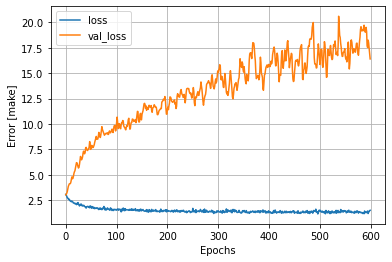

epochs=600, neurons=32, hidden_layers=4, learning_rate=0.007, dropout=0.2
2/2 [==============================] - 0s 5ms/step - loss: 4.3048 - accuracy: 0.6923
evaluation [4.3047685623168945, 0.692307710647583]


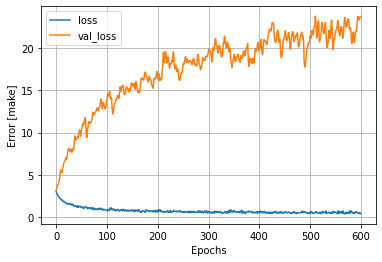

epochs=600, neurons=32, hidden_layers=4, learning_rate=0.007, dropout=0.4
2/2 [==============================] - 0s 10ms/step - loss: 4.3974 - accuracy: 0.5385
evaluation [4.397382736206055, 0.5384615659713745]


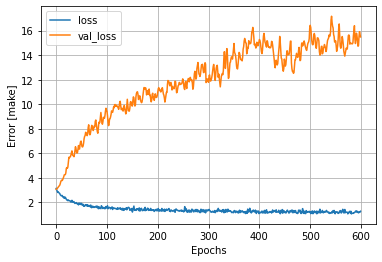

epochs=600, neurons=128, hidden_layers=2, learning_rate=0.01, dropout=0.2
2/2 [==============================] - 0s 7ms/step - loss: 4.7989 - accuracy: 0.6923
evaluation [4.798874378204346, 0.692307710647583]


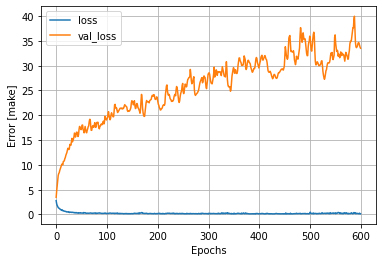

epochs=600, neurons=128, hidden_layers=2, learning_rate=0.01, dropout=0.4
2/2 [==============================] - 0s 11ms/step - loss: 6.4705 - accuracy: 0.7179
evaluation [6.47051477432251, 0.7179487347602844]


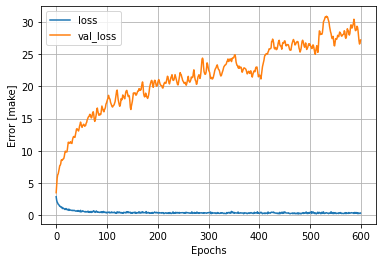

epochs=600, neurons=128, hidden_layers=2, learning_rate=0.007, dropout=0.2
2/2 [==============================] - 0s 10ms/step - loss: 4.8530 - accuracy: 0.7436
evaluation [4.8530120849609375, 0.7435897588729858]


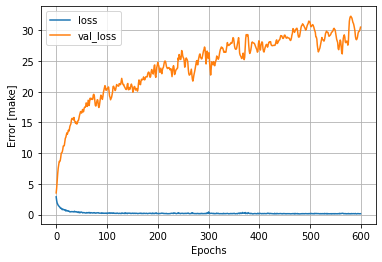

epochs=600, neurons=128, hidden_layers=2, learning_rate=0.007, dropout=0.4
2/2 [==============================] - 0s 11ms/step - loss: 4.7759 - accuracy: 0.7179
evaluation [4.775925636291504, 0.7179487347602844]


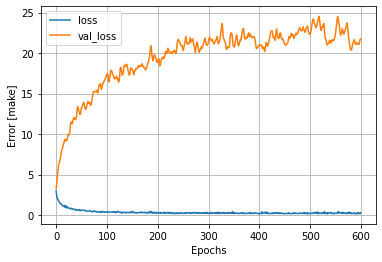

epochs=600, neurons=128, hidden_layers=4, learning_rate=0.01, dropout=0.2
2/2 [==============================] - 0s 12ms/step - loss: 8.7171 - accuracy: 0.6667
evaluation [8.717107772827148, 0.6666666865348816]


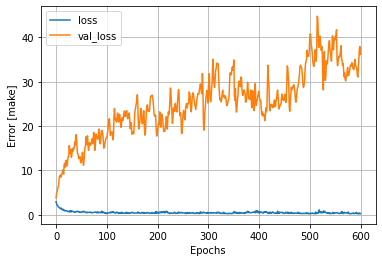

epochs=600, neurons=128, hidden_layers=4, learning_rate=0.01, dropout=0.4
2/2 [==============================] - 0s 6ms/step - loss: 4.0325 - accuracy: 0.6667
evaluation [4.032507419586182, 0.6666666865348816]


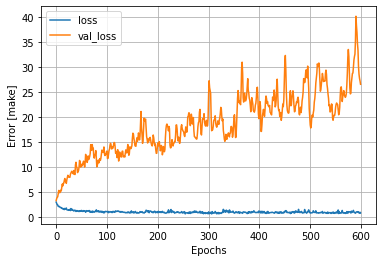

epochs=600, neurons=128, hidden_layers=4, learning_rate=0.007, dropout=0.2
2/2 [==============================] - 0s 11ms/step - loss: 2.7493 - accuracy: 0.6923
evaluation [2.7493226528167725, 0.692307710647583]


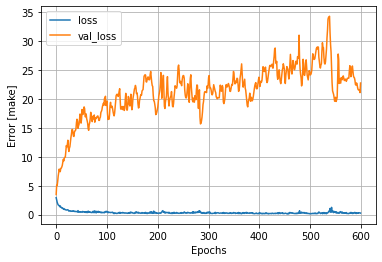

epochs=600, neurons=128, hidden_layers=4, learning_rate=0.007, dropout=0.4
2/2 [==============================] - 0s 12ms/step - loss: 4.6525 - accuracy: 0.7179
evaluation [4.6524786949157715, 0.7179487347602844]


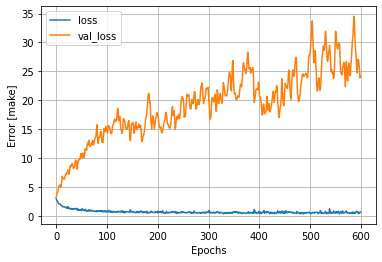

Best evaluation: [3.4813733100891113, 0.692307710647583]
With params: epochs=100, neurons=32, hidden_layers=2, learning_rate=0.01, dropout=0.2


In [18]:
learning_rate = [0.01, 0.007]
neurons_list = [32, 128]
epochs_list = [100, 600]
hidden_layers_list = [2, 4]
dropouts = [0.2, 0.4]
validation_split = 0.2
batch_size = 32

best_eval = [float('inf'), 0.0]
best_params = ''

for epochs, neurons, hidden_layers, learning_rate, dropout in list(itertools.product(*[epochs_list, neurons_list, hidden_layers_list, learning_rate, dropouts])):
    model = multi_layer(x_normalizer, neurons, hidden_layers, learning_rate, dropout)
    history = model.fit(
        X,
        Y,
        validation_split=validation_split,
        verbose=0, 
        batch_size=batch_size,
        epochs=epochs
    )
    params = f'{epochs=}, {neurons=}, {hidden_layers=}, {learning_rate=}, {dropout=}'
    print(params)
    evaluation = model.evaluate(x_test, y_test)
    if evaluation[0] < best_eval[0] and evaluation[1] > best_eval[1]:
        best_eval = evaluation
        best_params = params
    print('evaluation', model.evaluate(x_test, y_test))
    plot_loss(history)

print(f'Best evaluation: {best_eval}\nWith params: {best_params}')

In [19]:
model = multi_layer(x_normalizer, neurons=32, hidden_layers=2, learning_rate=0.01, dropout=0.2)

In [20]:
history = model.fit(
    X,
    Y,
    validation_split=validation_split,
    verbose=0, 
    batch_size=batch_size,
    epochs=100
)

2/2 [==============================] - 0s 5ms/step - loss: 3.5871 - accuracy: 0.6667


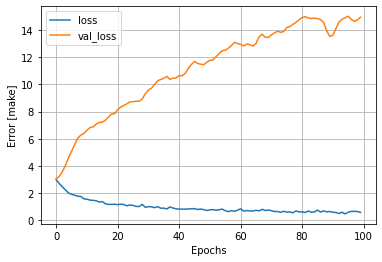

Accuracy: 0.6666666865348816
Loss: 3.5871031284332275


In [26]:
loss, accuracy = model.evaluate(x_test, y_test)
plot_loss(history)
print(f'Accuracy: {accuracy}\nLoss: {loss}')

In [21]:
predictions = [[body_style['sedan'], 103.5, 164, 121, 4250, 25, 24565], [body_style['hatchback'], 86.6, 92, 58, 4800, 54, 6479]]

In [22]:
predictions = [di_make[np.argmax(y)] for y in model.predict(predictions)]

1/1 [==============================] - 0s 79ms/step


In [23]:
predictions

['bmw', 'chevrolet']